In [88]:
from google.colab import files
uploaded = files.upload()


Saving DataMAchine.txt to DataMAchine (7).txt


In [89]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("DataMAchine (6).txt")

# Convert time strings to datetime objects
df['Time Start'] = pd.to_datetime(df['Time Start']).dt.time

# Calculate time intervals in seconds
df['Time Intervals'] = df['Time Start'].apply(lambda t: t.hour * 3600 + t.minute * 60)

# Create binary labels for machine usage
df['Usage'] = 1

# Divide the day into 30-minute intervals
intervals = [i * 1800 for i in range(48)]
interval_usage = []

for interval in intervals:
    interval_end = interval + 1800
    interval_data = df[(df['Time Intervals'] >= interval) & (df['Time Intervals'] < interval_end)]
    interval_usage.append(interval_data['Usage'].sum())

# Prepare the features and target
X = pd.DataFrame({'Interval': intervals})
y = interval_usage

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the usage count for each interval
predicted_usage = model.predict(X)

# Find the interval with the highest predicted usage count
peak_interval = intervals[predicted_usage.argmax()]
peak_start_time = datetime.min + timedelta(seconds=peak_interval)
peak_end_time = peak_start_time + timedelta(minutes=30)

print(f"The most used interval is {peak_start_time.time()} - {peak_end_time.time()}")


The most used interval is 10:30:00 - 11:00:00


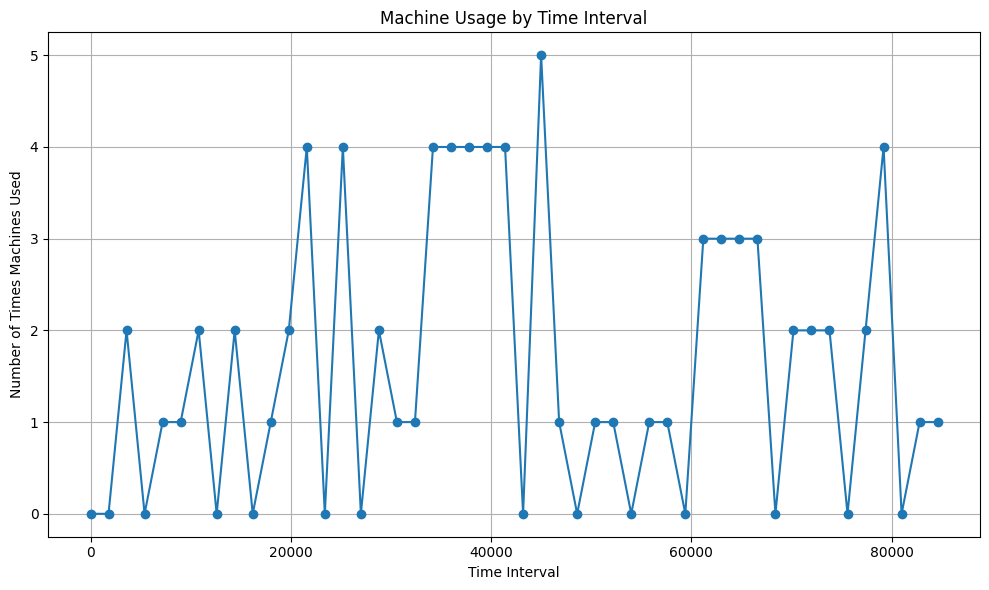

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(intervals, interval_usage, marker='o')
plt.xlabel('Time Interval')
plt.ylabel('Number of Times Machines Used')
plt.title('Machine Usage by Time Interval')

# Customize x-axis ticks for readability
plt.subplots_adjust(bottom=0.2)  # Adjust spacing for x-axis labels

plt.grid()
plt.tight_layout()
plt.show()
